In [41]:
import os

# Set the environment variable
os.environ['SCIPY_USE_PROPACK'] = '1'

import numpy as np
import matplotlib.pyplot as plt
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '/home/bpauldub/ShapleyFolkman/')
sys.path.insert(1, '/home/bpauldub/ShapleyFolkman/code/')



import scipy as sp
import os
from utils import create_pevs_problem

from pev import *
import matplotlib.ticker as ticker


In [42]:
scores = np.load("results/pev_n_500_N_24_Krange_13_nb_experiments_10.npy")
K_range = [50, 100, 150, 200, 350, 500, 1000, 2500, 5000, 7500, 10000, 15000, 20000]
scores.shape

(10, 3, 14)

In [45]:
scores_avg = np.mean(scores, axis=0)
scores_std = np.std(scores, axis=0)

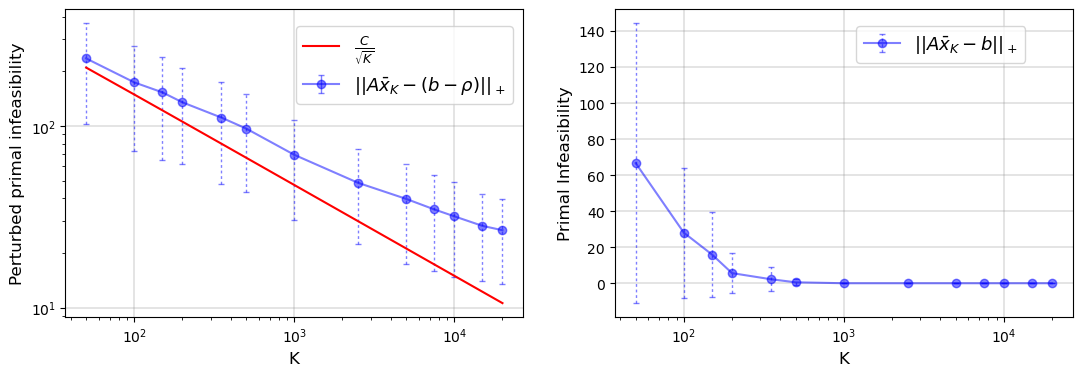

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,4))
ax1.set_axisbelow(True)
ax1.yaxis.grid(color='gray', linewidth=0.3)
ax1.xaxis.grid(color='gray', linewidth=0.3)
err = ax1.errorbar(K_range, scores_avg[2, :-1], scores_std[2, :-1],
             marker='o', color="blue", label=r"$||A \bar{x}_K - (b-\rho)||_+$",
             capsize=2,          # Width of the caps
    elinewidth=1,       # Line width of error bars
    capthick=1,         # Thickness of the caps
    alpha=0.5           # Transparency of the error bars
            )
ax1.plot(K_range,  1500/np.sqrt(np.array(K_range) + 1), color="red", label=r"$\frac{C}{\sqrt{K}}$")
ax1.set_xlabel("K", fontsize=12)
ax1.set_ylabel("Perturbed primal infeasibility", fontsize=12)
ax1.legend(bbox_to_anchor=(0.5, 0.95),
               borderaxespad=0.1, fontsize=13)
ax1.set_xscale("log")
ax1.set_yscale("log")
for bar in err[2]:  # err[2] contains the Line2D objects for the error bars
    bar.set_linestyle((0, (2, 2)))

ax2.set_axisbelow(True)
ax2.yaxis.grid(color='gray', linewidth=0.3)
ax2.xaxis.grid(color='gray', linewidth=0.3)
#ax2.plot(K_range, scores_avg[1, :-1], marker='x', color="blue", label=r"$||A \bar{x}_K - b||_+$")
err = ax2.errorbar(K_range, scores_avg[1, :-1], scores_std[1, :-1], 
             marker='o', color="blue", label=r"$||A \bar{x}_K - b||_+$",
                capsize=2,          # Width of the caps
    elinewidth=1,       # Line width of error bars
    capthick=1,         # Thickness of the caps
    alpha=0.5           # Transparency of the error bars
            )
for bar in err[2]:  # err[2] contains the Line2D objects for the error bars
    bar.set_linestyle((0, (2, 2)))
ax2.set_xscale("log")
ax2.set_xlabel("K", fontsize=12)
ax2.set_ylabel("Primal Infeasibility", fontsize=12)
ax2.legend(bbox_to_anchor=(0.9, 0.95),
               borderaxespad=0.1, fontsize=13)
fig.savefig("figures/fig_unfeas_full.pdf", format="pdf")

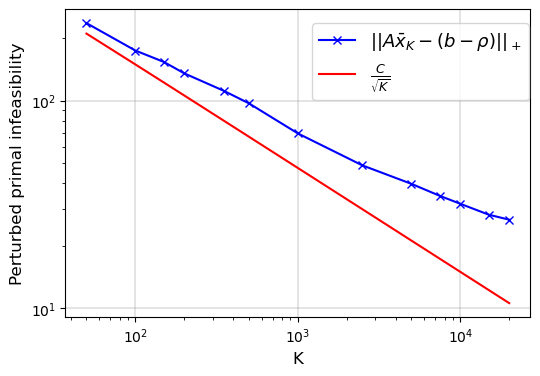

In [13]:
fig, (ax1) = plt.subplots(1, 1, figsize=(6,4))
ax1.set_axisbelow(True)
ax1.yaxis.grid(color='gray', linewidth=0.3)
ax1.xaxis.grid(color='gray', linewidth=0.3)
ax1.loglog(K_range, scores_avg[2, :-1], marker='x', color="blue", label=r"$||A \bar{x}_K - (b-\rho)||_+$")
ax1.loglog(K_range,  1500/np.sqrt(np.array(K_range) + 1), color="red", label=r"$\frac{C}{\sqrt{K}}$")
ax1.set_xlabel("K", fontsize=12)
ax1.set_ylabel("Perturbed primal infeasibility", fontsize=12)
fig.legend(bbox_to_anchor=(0.9, 0.85),
               borderaxespad=0.1, fontsize=13)
fig.savefig("figures/fig_unfeas_perturb.pdf", format="pdf")

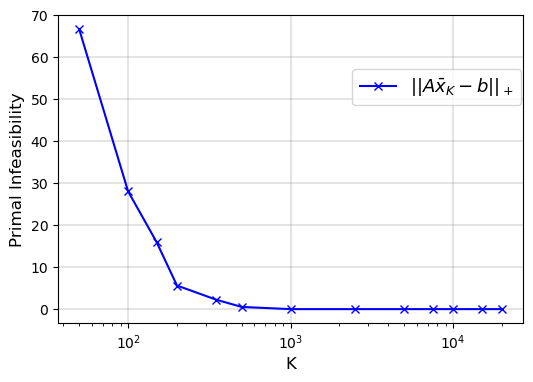

In [14]:
fig, (ax1) = plt.subplots(1, 1, figsize=(6,4))
ax1.set_axisbelow(True)
ax1.yaxis.grid(color='gray', linewidth=0.3)
ax1.xaxis.grid(color='gray', linewidth=0.3)
ax1.plot(K_range, scores_avg[1, :-1], marker='x', color="blue", label=r"$||A \bar{x}_K - b||_+$")
ax1.set_xscale("log")
ax1.set_xlabel("K", fontsize=12)
ax1.set_ylabel("Primal Infeasibility", fontsize=12)
fig.legend(bbox_to_anchor=(0.9, 0.75),
               borderaxespad=0.1, fontsize=13)
fig.savefig("figures/fig_unfeas.pdf", format="pdf")

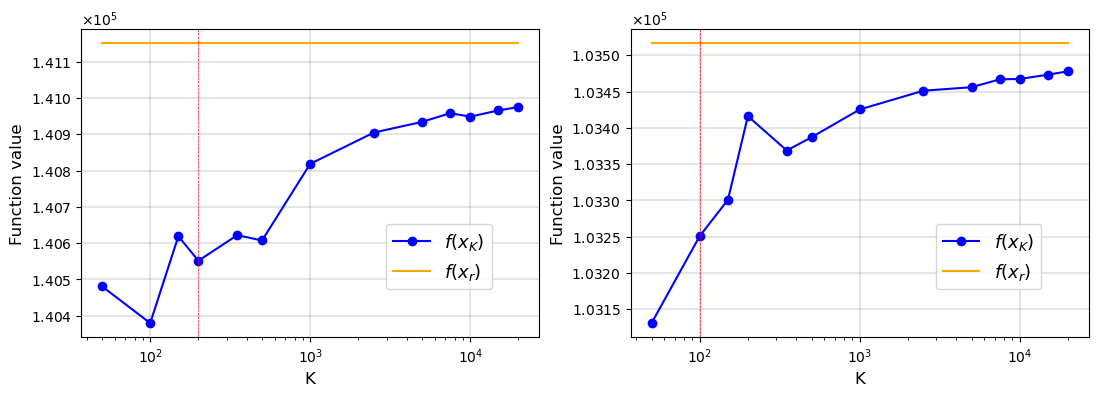

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,4))
rs = 8
i = np.where(scores[rs, 1, :] == 0)[0][0]
ax1.set_axisbelow(True)
ax1.yaxis.grid(color='gray', linewidth=0.3)
ax1.xaxis.grid(color='gray', linewidth=0.3)
ax1.plot(K_range, scores[rs, 0, :-1], marker='o', color="blue", label=r"$f(x_K)$")
ax1.plot(K_range,  [scores[rs, 0, -1]] * len(K_range), color="orange", label=r"$f(x_r)$")
ax1.axvline(x = K_range[i], color = 'red', linestyle="dashed", linewidth=0.5)
ax1.set_xlabel("K", fontsize=12)
ax1.set_xscale("log")
ax1.set_ylabel("Function value", fontsize=12)
ax1.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='y', style='sci', scilimits=(-2, 2))
ax1.legend(loc="lower right",
           bbox_to_anchor=(0.9, 0.15),
           fontsize=13,
               borderaxespad=0.1)

rs = 5
#find first K at which it is feasible
i = np.where(scores[rs, 1, :] == 0)[0][0]
ax2.set_axisbelow(True)
ax2.yaxis.grid(color='gray', linewidth=0.3)
ax2.xaxis.grid(color='gray', linewidth=0.3)
ax2.plot(K_range, scores[rs, 0, :-1], marker='o', color="blue", label=r"$f(x_K)$")
ax2.plot(K_range,  [scores[rs, 0, -1]] * len(K_range), color="orange", label=r"$f(x_r)$")
ax2.axvline(x = K_range[i], color = 'red', linestyle="dashed", linewidth=0.5)
ax2.set_xlabel("K", fontsize=12)
ax2.set_xscale("log")
ax2.set_ylabel("Function value", fontsize=12)
ax2.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax2.ticklabel_format(axis='y', style='sci', scilimits=(-2, 2))
ax2.legend(loc="lower right",
           bbox_to_anchor=(0.9, 0.15),
           fontsize=13,
               borderaxespad=0.1)
fig.savefig("figures/function_values.pdf", format="pdf")

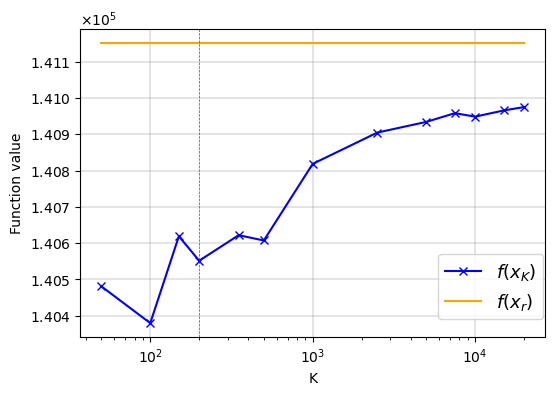

In [8]:
rs = 8
#find first K at which it is feasible
i = np.where(scores[rs, 1, :] == 0)[0][0]
fig, (ax1) = plt.subplots(1, 1, figsize=(6,4))
ax1.set_axisbelow(True)
ax1.yaxis.grid(color='gray', linewidth=0.3)
ax1.xaxis.grid(color='gray', linewidth=0.3)
ax1.plot(K_range, scores[rs, 0, :-1], marker='x', color="blue", label=r"$f(x_K)$")
ax1.plot(K_range,  [scores[rs, 0, -1]] * len(K_range), color="orange", label=r"$f(x_r)$")
ax1.axvline(x = K_range[i], color = 'red', linestyle="dashed", linewidth=0.5)
ax1.set_xlabel("K")
ax1.set_xscale("log")
ax1.set_ylabel("Function value")
ax1.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='y', style='sci', scilimits=(-2, 2))
fig.legend(loc="lower right",
           bbox_to_anchor=(0.9, 0.15),
           fontsize=13,
               borderaxespad=0.1)

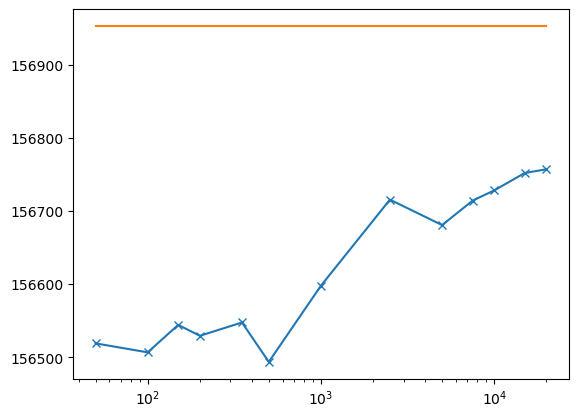

In [24]:
plt.plot(K_range, scores_avg[0, :-1], marker='x')
plt.plot(K_range, [scores_avg[0, -1]] * len(K_range))
plt.xscale("log")

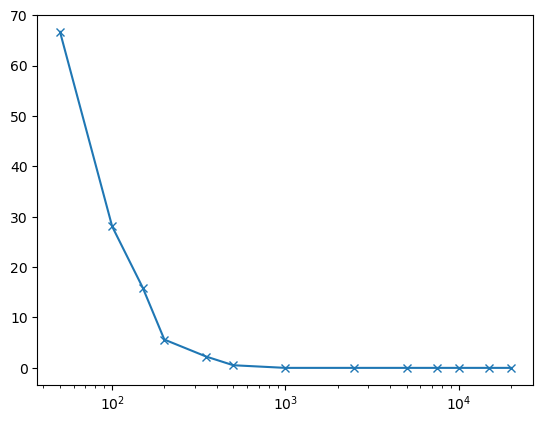

In [29]:
plt.plot(K_range, scores_avg[1, :-1], marker='x')
plt.xscale("log")

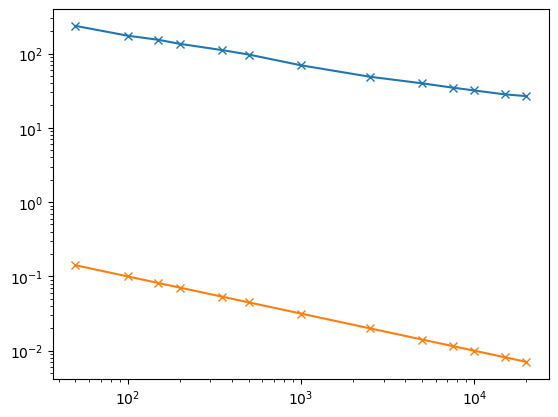

In [28]:
plt.plot(K_range, scores_avg[2, :-1], marker='x')
plt.plot(K_range,  1/np.sqrt(np.array(K_range)), marker='x')
plt.yscale("log")
plt.xscale("log")

In [63]:
scores_avg[2, :-1]

array([235.87439717, 174.08023397, 153.36173718, 135.19436149,
       111.45212144,  96.99903645,  69.51751221,  48.75765369,
        39.76189018,  34.78198447,  31.88247866,  28.23486646,
        26.72881645])

In [30]:
rs = 2

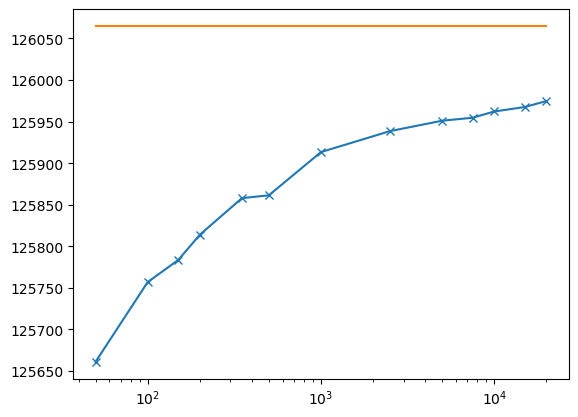

In [31]:
plt.plot(K_range, scores[rs, 0, :-1], marker='x')
plt.plot(K_range, [scores[rs, 0, -1]] * len(K_range))
plt.xscale("log")

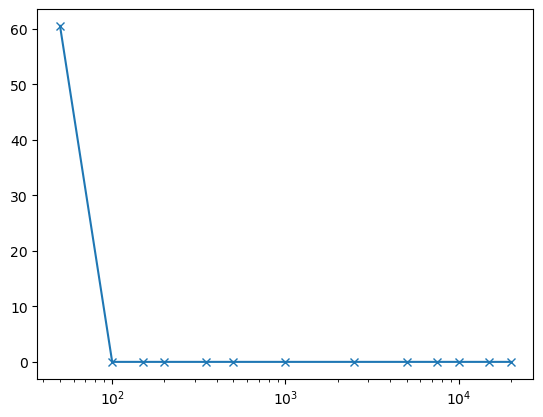

In [20]:
plt.plot(K_range, scores[rs, 1, :-1], marker='x')
#plt.plot(K_range,  1/np.sqrt(np.array(K_range)), marker='x')
#plt.plot(K_range,  1/np.array(K_range))
#plt.yscale("log")
plt.xscale("log")

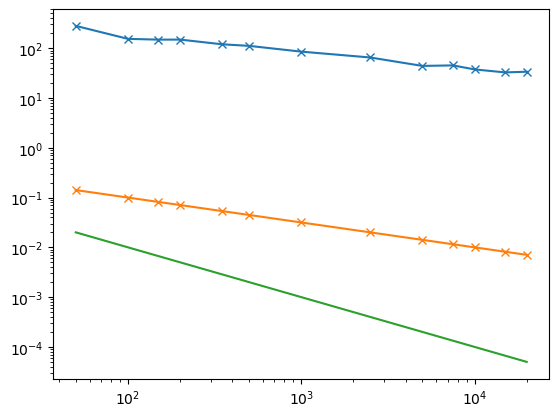

In [21]:
plt.plot(K_range, scores[rs, 2, :-1], marker='x')
plt.plot(K_range,  1/np.sqrt(np.array(K_range)), marker='x')
plt.plot(K_range,  1/np.array(K_range))
plt.yscale("log")
plt.xscale("log")

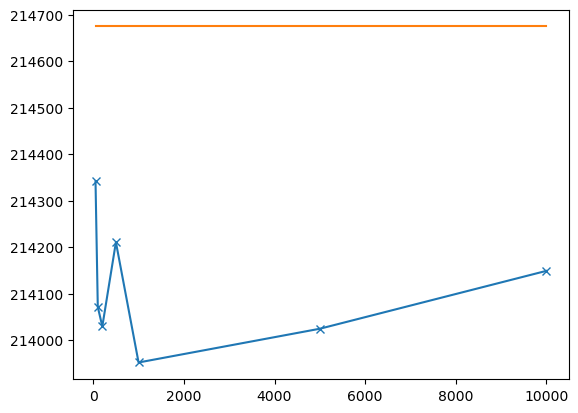

In [66]:
plt.plot(K_range, scores[0, :-1], marker='x')
plt.plot(K_range,  [scores[0, -1]] * len(K_range))

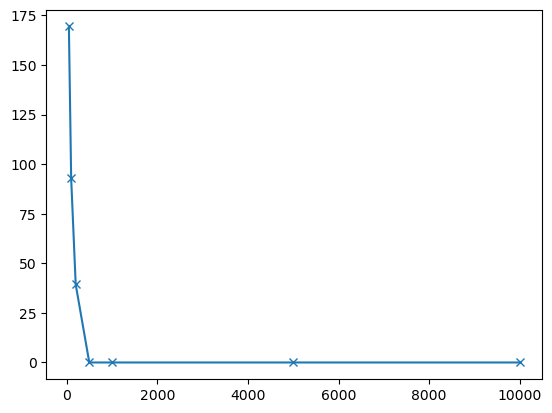

In [65]:
plt.plot(K_range, scores[1, :-1], marker='x')

In [24]:
def solve_pev(prob, eta="1/k", max_iter=1000, solve_contracted_problem=False):

    lbd = np.zeros(prob.m)

    if solve_contracted_problem:
        b = prob.b_bar.copy()
    else:
        b = prob.b.copy()

    y_k_prev = 0
    
    for k in range(1, max_iter):
        d_lbd = -b.dot(lbd)

        y_k = np.zeros((prob.di, prob.n))
        for i in range(n):
            y_ik = prob.compute_linear_min_dom_fi(i, prob.get_linear_coefficient(i) + prob.compute_AiT_dot_g(i, lbd))
            d_lbd += prob.get_linear_coefficient(i).dot(y_ik) + lbd.dot(prob.compute_Ai_dot_y(i, y_ik))  
            y_k[:, i] = y_ik


        if eta=="1/k":
            etak = 1/(k+1)
        else:
            etak = eta

        y_k = np.zeros((prob.di, prob.n))
        f_lbd = -b.dot(lbd)
        for i in range(n):
            f_lbdi, y_ik = prob.f_conjugate_i(i, -prob.compute_AiT_dot_g(i, lbd))
            f_lbd -= f_lbdi
            y_k[:, i] = y_ik

        
        gamma_k = prob.compute_A_dot_x(y_k) - b
        lbd = lbd + etak * gamma_k
        lbd = np.clip(lbd, 0, None)
        if k%100 == 0:
            print("    ", k, d_lbd, f_lbd, np.linalg.norm(y_k - y_k_prev), np.linalg.norm(np.clip(prob.compute_A_dot_x(y_k) - prob.b, 0, None), 1))
            #print(lbd)

        y_k_prev = y_k.copy()
    return y_k


In [28]:
start_time_subgrad = time.time()
y_final = solve_pev(pev_prob, max_iter=20000, solve_contracted_problem=True)
print(f"Time subgrad = {time.time() - start_time_subgrad}")

     100 51132.79675143778 51132.79675143778 34.61213659975356 586.579906304074
     200 54356.09960415476 54356.09960415476 34.61213659975356 586.579906304074
     300 55424.20980722722 55424.20980722722 34.61213659975356 586.579906304074
     400 55957.135582445226 55957.135582445226 34.49637662132068 586.579906304074
     500 55125.00969179105 55125.00969179105 34.49637662132068 586.579906304074
     600 56030.71375504215 56030.71375504215 28.319604517012593 586.579906304074
     700 55366.34029295573 55366.34029295573 34.49637662132068 586.579906304074
     800 55270.453427638895 55270.45342763889 34.49637662132068 586.579906304074
     900 55618.29172514341 55618.29172514342 34.49637662132068 586.579906304074
     1000 55710.360237167144 55710.360237167144 34.49637662132068 586.579906304074
     1100 55937.2458397421 55937.245839742114 31.432467291003423 586.579906304074
     1200 55943.04498818554 55943.04498818554 24.49489742783178 586.579906304074
     1300 56019.76270709814 56

In [12]:
pev_prob.f(y_final, check_feasibility=True, check_integer_constraint=True)

72605.23859711918

In [12]:
pev_prob.compute_A_dot_x(y_final) - pev_prob.b, np.linalg.norm(np.clip(pev_prob.compute_A_dot_x(y_final) - pev_prob.b, 0, None))

(array([-600.        , -600.        , -600.        , -600.        ,
         -52.94745454, -344.0952617 , -600.        , -600.        ,
        -600.        , -544.39598706, -600.        ,  196.47788875,
         196.47788875,  191.49721086, -600.        , -600.        ,
        -600.        , -600.        , -600.        , -600.        ,
        -600.        , -600.        , -600.        , -600.        ]),
 337.4585949497286)

In [17]:
pev_prob.b_bar

array([480.46373052, 480.46373052, 480.46373052, 480.46373052,
       480.46373052, 480.46373052, 480.46373052, 480.46373052,
       480.46373052, 480.46373052, 480.46373052, 480.46373052,
       480.46373052, 480.46373052, 480.46373052, 480.46373052,
       480.46373052, 480.46373052, 480.46373052, 480.46373052,
       480.46373052, 480.46373052, 480.46373052, 480.46373052])

In [65]:
y_final[0, :]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
def solve_milp(pev_prob):
    n = pev_prob.n
    N = pev_prob.m

    prob = pulp.LpProblem("PEV", LpMinimize)
    
    #variables for the relaxed LP problem
    u_vars = pulp.LpVariable.dicts(
            "w", (range(n), range(N)), lowBound=0, upBound=1, cat="Binary"
        )
    #e_vars = pulp.LpVariable.dicts(
    #        "e", (range(n), range(N+1)), lowBound=0, upBound=None, cat="Continuous"
    #    )
    
    #prob += (pulp.lpSum([P[i] * ( Cu[j] * u_vars[i][j] for j in range(m)) for i in range(n)]), "Total cost")
    prob += (pulp.lpSum([pev_prob.P[i] * pev_prob.Cu[j] * u_vars[i][j] for j in range(N) for i in range(n)]), "Total cost")

    for j in range(N):
        prob += pulp.lpSum([pev_prob.P[i] * u_vars[i][j] for i in range(n)]) <= pev_prob.P_max[j], (f"Coupling constraint max at time step {j}")
            #prob += pulp.lpSum([pev_prob.P[i] * u_vars[i][j] for i in range(n)]) >= pev_prob.P_min[j], (f"Coupling constraint min at time step {j}")
            #no need to consider P_min in charging only scenario when P_min < 0

    for i in range(n):
        prob += pulp.lpSum([u_vars[i][j] for j in range(N)]) >= np.ceil((pev_prob.E_ref[i] - pev_prob.E_init[i]) / (pev_prob.P[i] * pev_prob.delta_T * pev_prob.xi_u[i])), (f"E_ref constraint at {i}")
        prob += pulp.lpSum([u_vars[i][j] for j in range(N)]) <= np.ceil((pev_prob.E_max[i] - pev_prob.E_init[i]) / (pev_prob.P[i] * pev_prob.delta_T * pev_prob.xi_u[i])), (f"E_max constraint at {i}")
    
    
    
    prob.solve()
    u = np.zeros((N, n))
    for i in range(n):
        for j in range(N):
            u[j, i] = u_vars[i][j].varValue
    u_col = u.reshape((-1,), order='F')
    return u, u_col

y, y_col = solve_milp(pev_prob)

AssertionError: 